#### Load dataset in csv format

In [24]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

column_names = [
"Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
"Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
"Color_intensity", "Hue", "OD280_OD315", "Proline"
]

df = pd.read_csv(url,header=None,names=column_names)
df.head(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Data exploration

In [25]:
df.info() #basic infomation of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [26]:
df['Class'].value_counts() #figure out each class sum

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [27]:
df.isnull().sum() #check null values sum of each column

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

This shows no null values in each column

#### Data preprocessing

In [28]:
#removing outliers using zcore method
from scipy import stats 
def remove_outliers_function(data,threshold=3):
    z_scores=data.apply(stats.zscore)
    return data[(z_scores<threshold).all(axis=1)]

df=remove_outliers_function(df)
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
#checking for highly correlated features to diamentional reduction
df_corr = df.corr()
df_corr

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
Class,1.000000,-0.357820,0.463305,-0.041075,0.558514,-0.237854,-0.749746,-0.879415,0.506426,-0.571198,0.253562,-0.647688,-0.800414,-0.643492
Alcohol,-0.357820,1.000000,0.100100,0.217710,-0.333081,0.386905,0.337356,0.304664,-0.178321,0.222456,0.534614,-0.010839,0.116049,0.658710
Malic_acid,0.463305,0.100100,1.000000,0.220442,0.334173,0.007750,-0.368951,-0.457109,0.328408,-0.256059,0.294579,-0.568548,-0.396191,-0.178897
Ash,-0.041075,0.217710,0.220442,1.000000,0.397545,0.358603,0.104570,0.058304,0.136174,0.059571,0.242198,-0.076281,-0.024420,0.244731
Alcalinity_of_ash,0.558514,-0.333081,0.334173,0.397545,1.000000,-0.181780,-0.432285,-0.469168,0.376861,-0.282713,0.004077,-0.336307,-0.355129,-0.471656
Magnesium,-0.237854,0.386905,0.007750,0.358603,-0.181780,1.000000,0.213542,0.196746,-0.240273,0.136689,0.311764,-0.014679,0.018876,0.429594
Total_phenols,-0.749746,0.337356,-0.368951,0.104570,-0.432285,0.213542,1.000000,0.875180,-0.480293,0.629686,-0.058654,0.475219,0.705484,0.527742
Flavanoids,-0.879415,0.304664,-0.457109,0.058304,-0.469168,0.196746,0.875180,1.000000,-0.586702,0.721467,-0.168892,0.593101,0.789215,0.536099
Nonflavanoid_phenols,0.506426,-0.178321,0.328408,0.136174,0.376861,-0.240273,-0.480293,-0.586702,1.000000,-0.389416,0.108066,-0.283704,-0.517395,-0.313536
Proanthocyanins,-0.571198,0.222456,-0.256059,0.059571,-0.282713,0.136689,0.629686,0.721467,-0.389416,1.000000,-0.003852,0.334152,0.559015,0.383929


Text(0.5, 1.0, 'Correlation Matrix (range of -0.6 to 0.6)')

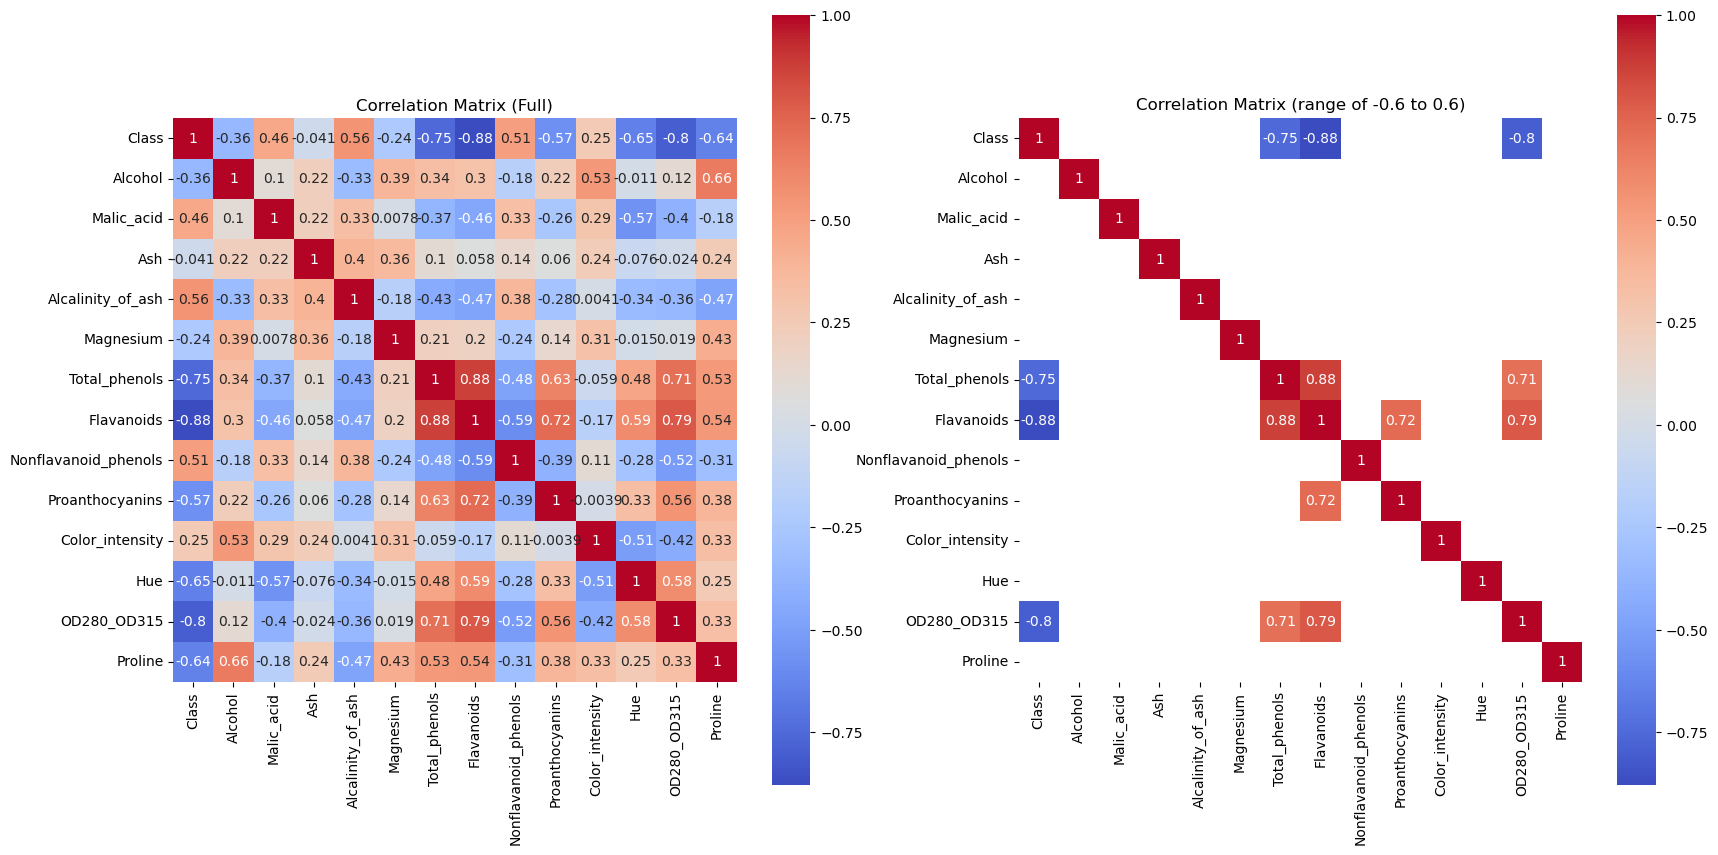

In [30]:
# show the correlation matrix and the correlation matrix with the range of -0.6 to 0.6

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix=df_corr[(df_corr>0.7)|(df_corr<-0.7)]

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes=axes.flatten()

sns.heatmap(df_corr,annot=True,cmap='coolwarm',square=True,ax=axes[0])
axes[0].set_title('Correlation Matrix (Full)')

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True,ax=axes[1])
axes[1].set_title('Correlation Matrix (range of -0.6 to 0.6)')

According to above correlation matrix,there are two highly correlated features.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1."Total_phenols" and "Flavanoids" - 0.87<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2."Flavanoids" and "OD280_OD315" - 0.79<br><br>

Therefore,We can drop "Total_phenols" and "OD280_OD315" features from the dataset.


In [31]:
# Drop highly correlated features
df_reduced=df.drop(['Total_phenols','OD280_OD315'],axis=1)
df_reduced

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Proline
0,1,14.23,1.71,2.43,15.6,127,3.06,0.28,2.29,5.64,1.04,1065
1,1,13.20,1.78,2.14,11.2,100,2.76,0.26,1.28,4.38,1.05,1050
2,1,13.16,2.36,2.67,18.6,101,3.24,0.30,2.81,5.68,1.03,1185
3,1,14.37,1.95,2.50,16.8,113,3.49,0.24,2.18,7.80,0.86,1480
4,1,13.24,2.59,2.87,21.0,118,2.69,0.39,1.82,4.32,1.04,735
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,0.61,0.52,1.06,7.70,0.64,740
174,3,13.40,3.91,2.48,23.0,102,0.75,0.43,1.41,7.30,0.70,750
175,3,13.27,4.28,2.26,20.0,120,0.69,0.43,1.35,10.20,0.59,835
176,3,13.17,2.59,2.37,20.0,120,0.68,0.53,1.46,9.30,0.60,840


#### Data preparation

separate feature variables and target variables

In [33]:
#feature variable set
x = df_reduced.drop("Class",axis=1)
x

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.69,0.39,1.82,4.32,1.04,735
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,0.61,0.52,1.06,7.70,0.64,740
174,13.40,3.91,2.48,23.0,102,0.75,0.43,1.41,7.30,0.70,750
175,13.27,4.28,2.26,20.0,120,0.69,0.43,1.35,10.20,0.59,835
176,13.17,2.59,2.37,20.0,120,0.68,0.53,1.46,9.30,0.60,840


In [34]:
#target variable
y = df_reduced["Class"]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 169, dtype: int64

In [37]:
#feature scaling
from sklearn.discriminant_analysis import StandardScaler
scaler=StandardScaler()
x = scaler.fit_transform(x)

In [38]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [41]:
x_train.shape,y_train.shape

((135, 11), (135,))

In [42]:
x_test.shape,y_test.shape

((34, 11), (34,))

#### figure out best k value

The optimal k value is: 8


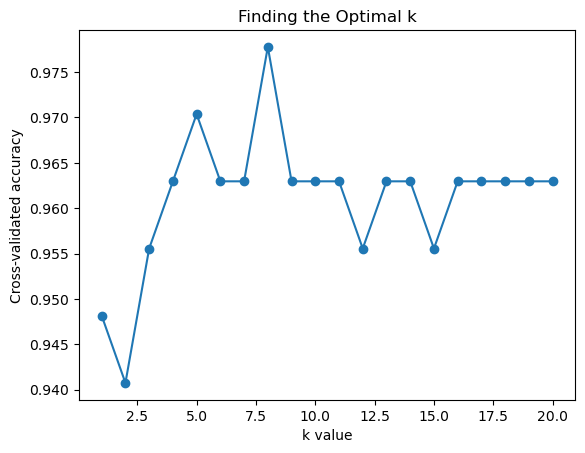

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to test
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and get the mean score for this k
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k value with the highest accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print("The optimal k value is:", optimal_k)

#Plot the results
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Cross-validated accuracy')
plt.title('Finding the Optimal k')
plt.show()


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [45]:
pred = model.predict(x_test)
pred

array([3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 2])

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[15,  0,  0],
       [ 1, 11,  0],
       [ 0,  0,  7]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         7

    accuracy                           0.97        34
   macro avg       0.98      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy #accuracy = 97.1%

0.9705882352941176

Conclusion:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;This project effectively presents how the K-Nearest Neighbors algorithm can be applied in a classification problem regarding the origin of wine            samples based on their chemical properties. After preprocessing the data         (including handling outliers and standardization), KNN was applied, and                        cross-validation was used to determine the optimal k value.
The model was accurate, giving the accuracy of about 97.1% when optimal k value is 8. That's rather       good and showed that KNN should work for this task. Optimizing k, the model balanced bias and variance, hence avoiding underfitting and overfitting.
